# Statistical task

## 1. Load CSV files

In [36]:
import pandas as pd

student_mat_df = pd.read_csv('student-mat.csv', sep=';')
student_por_df = pd.read_csv('student-por.csv', sep=';', quoting=3)

# Clean the extra quotes from student_por_df
for col in student_por_df.columns:
    if student_por_df[col].dtype == 'object':
        student_por_df[col] = student_por_df[col].str.replace('""', '', regex=False)

# Convert G1, G2, G3 to numeric in student_por_df
student_por_df['G1'] = pd.to_numeric(student_por_df['G1'], errors='coerce')
student_por_df['G2'] = pd.to_numeric(student_por_df['G2'], errors='coerce')
student_por_df['G3'] = pd.to_numeric(student_por_df['G3'], errors='coerce')

In [37]:
print('Student Mat Dataset has: ', student_mat_df.shape[0], 'rows and', student_mat_df.shape[1], 'columns')
print('Student Por Dataset has: ', student_por_df.shape[0], 'rows and', student_por_df.shape[1], 'columns')

Student Mat Dataset has:  395 rows and 33 columns
Student Por Dataset has:  650 rows and 33 columns


In [38]:
student_por_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [39]:
por_numeric = student_por_df.select_dtypes(include='number').columns.tolist()
por_categorical = student_por_df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Student Por numeric and categorical features: \n')
print(f"Numeric Features ({len(por_numeric)}):")
print(por_numeric)
print(f"\nCategorical Features ({len(por_categorical)}):")
print(por_categorical)

Student Por numeric and categorical features: 

Numeric Features (16):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical Features (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [40]:
mat_numeric = student_mat_df.select_dtypes(include='number').columns.tolist()
mat_categorical = student_mat_df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Student Mat numeric and categorical features: \n')
print(f"Numeric Features ({len(mat_numeric)}):")
print(mat_numeric)
print(f"\nCategorical Features ({len(mat_categorical)}):")
print(mat_categorical)

Student Mat numeric and categorical features: 

Numeric Features (16):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical Features (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


### **Result Explanation**
### 1. Reading the CSV files
The original CSV files were not formatted well, so I applied some adjustments to load both files properly into DataFrames.

### 2. Retrieving rows and columns
I used the .shape attribute to find the number of rows and columns in each DataFrame.
**shape[0]** gives the number of rows
**shape[1]** gives the number of columns

### 3. Listing categorical and numeric features
I used **select_dtypes()** to separate the categorical and numeric columns in the dataset. Both mat and por CSV files have same features.

## 2. G1, G2 and G3 visualization

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def analyze_dataset(df, title):
    print(f"\n {title}")
    
    # Make a copy
    data = df.copy()
    
    # Encode categorical columns
    label_encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = label_encoder.fit_transform(data[col])
    
    # Compute correlation matrix
    corr = data.corr()
    
    # Heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, 
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(f"Correlation Heatmap - {title}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Show top correlated features for grades (excluding other grade columns)
    grade_cols = ['G1', 'G2', 'G3']
    print(f"\n TOP 3 PREDICTIVE FEATURES FOR EACH GRADE \n")
    
    for target in grade_cols:
        # Exclude other grade columns from correlation
        other_grades = [g for g in grade_cols if g != target]
        target_corr = corr[target].drop(grade_cols).abs().sort_values(ascending=False)
        
        print(f"\n{target} - Top 3 Most Influential Features:")
        for i, (feature, corr_value) in enumerate(target_corr.head(3).items(), 1):
            print(f"  {i}. {feature:15s} : {corr_value:.4f}")
    
    return corr



 Student Math Dataset


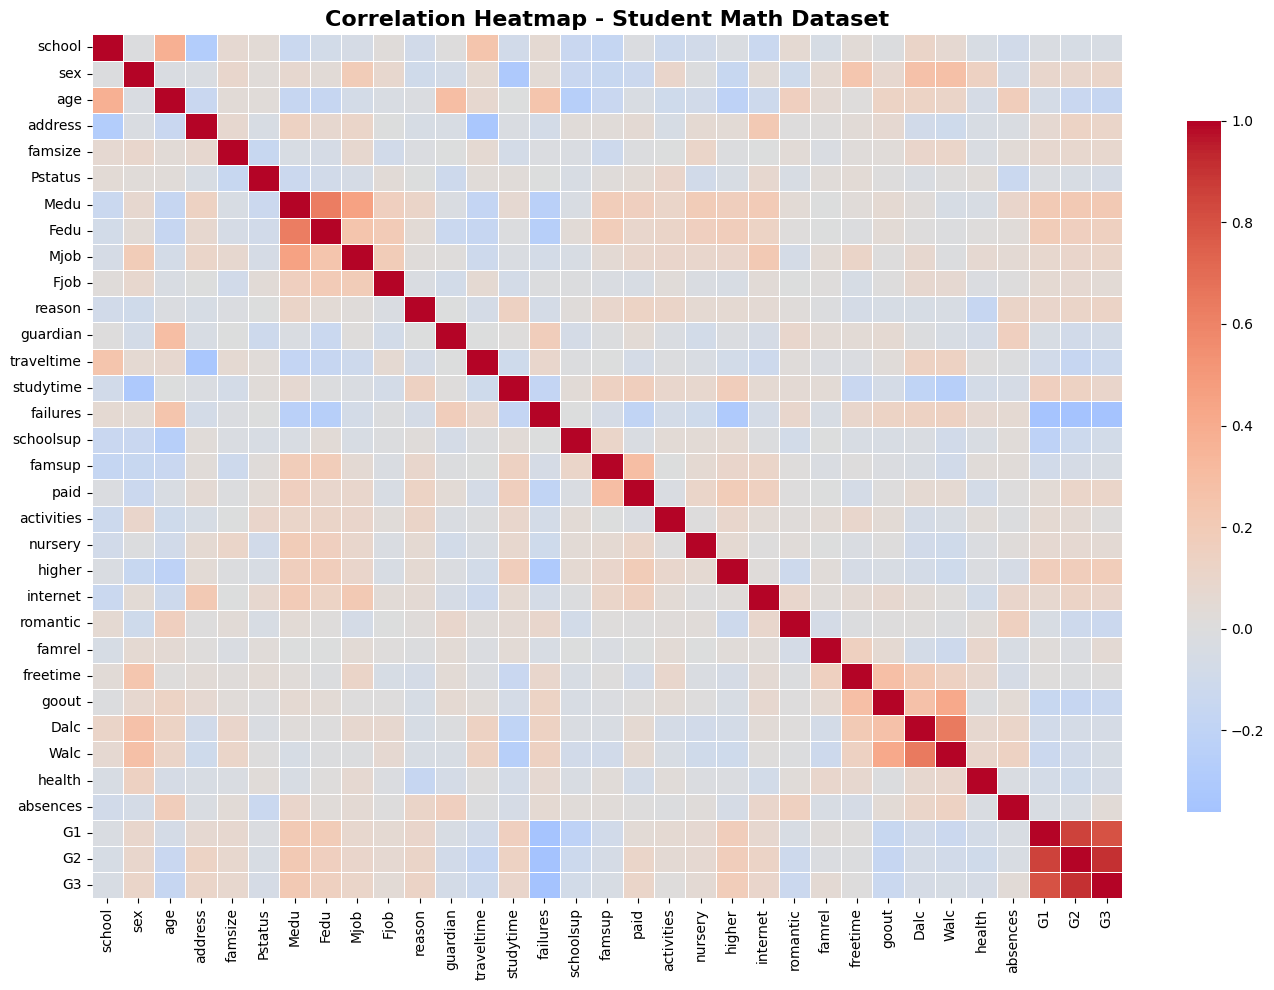


 TOP 3 PREDICTIVE FEATURES FOR EACH GRADE 


G1 - Top 3 Most Influential Features:
  1. failures        : 0.3547
  2. schoolsup       : 0.2126
  3. Medu            : 0.2053

G2 - Top 3 Most Influential Features:
  1. failures        : 0.3559
  2. Medu            : 0.2155
  3. higher          : 0.1791

G3 - Top 3 Most Influential Features:
  1. failures        : 0.3604
  2. Medu            : 0.2171
  3. higher          : 0.1825

 Student Portuguese Dataset


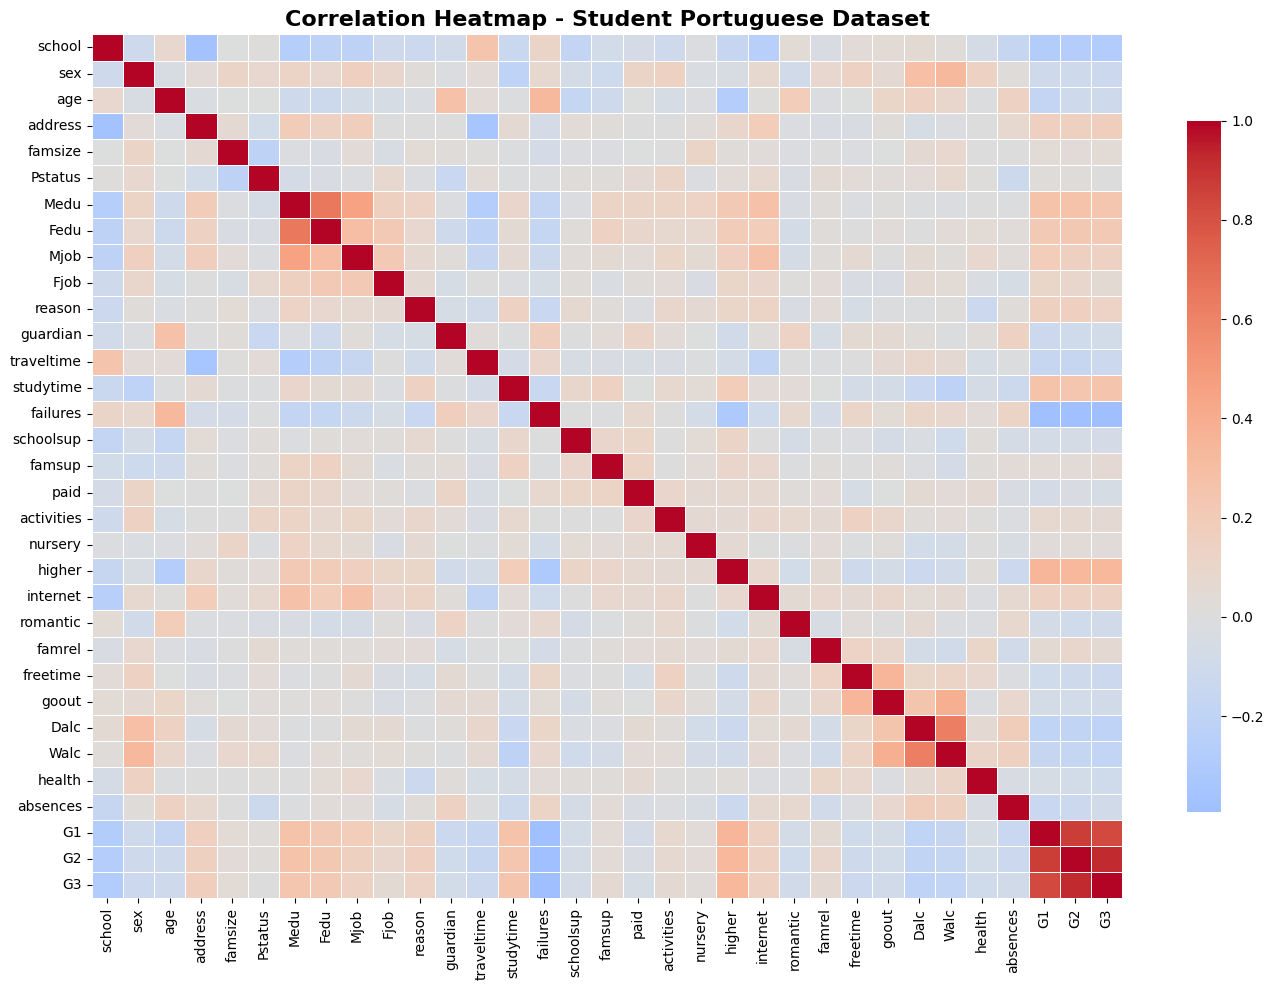


 TOP 3 PREDICTIVE FEATURES FOR EACH GRADE 


G1 - Top 3 Most Influential Features:
  1. failures        : 0.3842
  2. higher          : 0.3490
  3. school          : 0.2776

G2 - Top 3 Most Influential Features:
  1. failures        : 0.3858
  2. higher          : 0.3320
  3. school          : 0.2676

G3 - Top 3 Most Influential Features:
  1. failures        : 0.3933
  2. higher          : 0.3322
  3. school          : 0.2818


In [42]:
# Run analysis on both datasets
corr_mat = analyze_dataset(student_mat_df, "Student Math Dataset")
corr_por = analyze_dataset(student_por_df, "Student Portuguese Dataset")

### **Analysis of Key Features Influencing Student Grades**

In this analysis, we examined two student performance datasets: **Math** students (`student-mat.csv`) and **Portuguese** students (`student-por.csv`). Our goal was to determine which attributes have the strongest influence on the students’ grades `G1`, `G2`, and `G3`.

### Methodology

1. **Preprocessing**
   Many attributes in the dataset, such as *school*, *address*, and *guardian*, are categorical. Since correlation calculations require numeric values, all categorical features were converted into numerical form using `LabelEncoder`.

2. **Correlation Matrix**
   A correlation matrix was computed for each dataset, showing the strength and direction of relationships between all numeric variables. Positive values indicate that as one variable increases, the other tends to increase as well, while negative values indicate the opposite trend.

3. **Heatmap Visualization**
   A heatmap was generated using Seaborn to provide a visual representation of the correlation structure. Darker shades and stronger colors represent stronger correlations.

4. **Identifying Influential Features**
   For each dataset, we calculated the **three most strongly correlated features for each grade column (`G1`, `G2`, and `G3`)**, excluding the other grade columns themselves. This reveals which non-grade factors appear most predictive of academic performance.

### Results Summary

* **Previous Performance is the Strongest Predictor**
  In both datasets, early-term grades (such as `G1` and `G2`) show the strongest influence on the final grade `G3`. This indicates that consistent performance throughout the school term is a major determinant of the final outcome.

* **Behavior and Study Habits Matter**
  Features such as `studytime`, `failures`, and `absences` commonly show strong correlation with grades. Higher study time and fewer past failures generally correspond to better academic results.

* **Demographics Have Weaker Influence**
  Variables such as parental occupation, address, or school typically show weaker correlations, suggesting that environmental factors play a smaller role compared to academic behaviors and past performance.

### Conclusion

The analysis demonstrates that student success is most strongly tied to:

* Consistent academic performance across grading periods
* Commitment to study
* Avoiding repeated failures and absenteeism

By understanding which features matter most, educators and researchers can better identify at-risk students and design interventions that support learning throughout the school term.
